# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

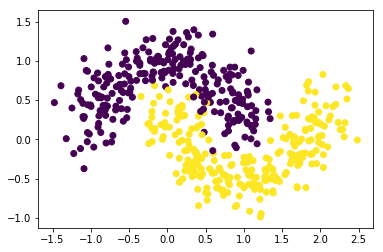

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
from sklearn.model_selection import train_test_split

y_train = moons_labels

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(moons_points)

### Inside: 
We will not split our data here for Train-test, because we just want to see how good we can fit this figures

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [77]:
def plot_decisions(estimator:callable, X_train, y_train, add_label):
    estimator.fit(X_train, y_train)
    
    plot_decision_regions(X_train, y_train, clf = estimator, legend=2)
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title('Moons points ' + str(estimator)[0:str(estimator).find('(')]+ ' ' + add_label)
    plt.show()
    
    print('f1 score = {}'.format(f1_score(estimator.predict(X_train), y_train)))
    print('Accuracy = {}'.format(estimator.score(X_train, y_train)))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from mlxtend.plotting import plot_decision_regions

# liblinear solver works better here

lr = LogisticRegression(max_iter=10000, tol = 0.0001, solver='liblinear') # add some params
svm = SVC(kernel='linear', max_iter = 10000, tol = 0.0001) # here too

parametrs_1 = {'C':np.linspace(0.1, 20, 10), 'penalty':['l2']}
parametrs_2 = {'C':np.linspace(0.1, 20, 10)}

In [9]:
gs_lr = GridSearchCV(lr, parametrs_1, cv = 5, scoring = 'accuracy', n_jobs=-1)

gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 0.1    ,  2.31111,  4.52222,  6.73333,  8.94444, 11.15556,
       13.36667, 15.57778, 17.78889, 20.     ]), 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
gs_svm = GridSearchCV(svm, parametrs_2, cv = 5, scoring = 'accuracy', n_jobs=-1)

gs_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 0.1    ,  2.31111,  4.52222,  6.73333,  8.94444, 11.15556,
       13.36667, 15.57778, 17.78889, 20.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
gs_svm.best_score_

0.854

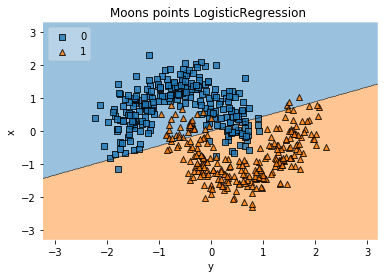

f1 score = 0.8606060606060605
Accuracy = 0.862


In [78]:
lr_best = LogisticRegression(max_iter=10000, tol = 0.0001, solver='liblinear', C=2.3, penalty='l2')

plot_decisions(lr_best, X_train, y_train, '')

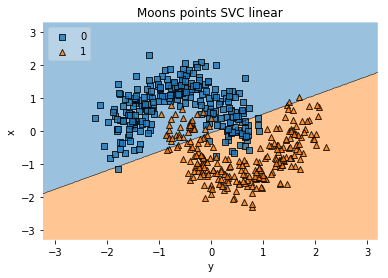

f1 score = 0.8548387096774194
Accuracy = 0.856


In [79]:
svm_lin = SVC(kernel='linear', max_iter = 10000, tol = 0.0001, C=0.1)

plot_decisions(svm_lin, X_train, y_train, 'linear')

### Inside:
As we can see SVC-linear is like simple logistic regression with a small difference in accuracy/f1 score

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

##### №1 Polynominal

In [57]:
svm_poly = SVC(kernel='poly', max_iter = 10000, tol = 0.0001)

parametrs = {'C':np.linspace(5, 15, 10), 'degree':[2, 3, 4, 5], 'coef0': np.linspace(0, 2, 10),\
             'gamma':np.linspace(0, 1, 5)}

grid_search = GridSearchCV(svm_poly, parametrs, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 5.     ,  6.11111,  7.22222,  8.33333,  9.44444, 10.55556,
       11.66667, 12.77778, 13.88889, 15.     ]), 'degree': [2, 3, 4, 5], 'coef0': array([0.     , 0.22222, 0.44444, 0.66667, 0.88889, 1.11111, 1.33333,
       1.55556, 1.77778, 2.     ]), 'gamma': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
grid_search.best_estimator_

SVC(C=6.111111111111111, cache_size=200, class_weight=None,
  coef0=0.2222222222222222, decision_function_shape='ovr', degree=3,
  gamma=0.75, kernel='poly', max_iter=10000, probability=False,
  random_state=None, shrinking=True, tol=0.0001, verbose=False)

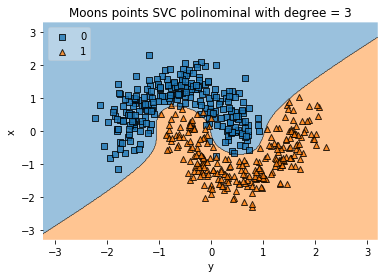

f1 score = 0.9859719438877755
Accuracy = 0.986


In [80]:
svm_poly_best = SVC(C=6.111, cache_size=200, class_weight=None,
  coef0=0.22222, decision_function_shape='ovr', degree=3,
  gamma=0.75, kernel='poly', max_iter=10000, probability=False,
  random_state=None, shrinking=True, tol=0.0001, verbose=False)

plot_decisions(svm_poly_best, X_train, y_train, 'polinominal with degree = 3')

##### №2 Radial basis function kernel

In [94]:
svm_rbf = SVC(kernel='rbf', max_iter = 10000, tol = 0.0001)

parametrs_rbf = {'C':np.linspace(1, 20, 20), 'gamma':np.linspace(1, 3, 20)}

grid_search_rbf = GridSearchCV(svm_rbf, parametrs_rbf, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.]), 'gamma': array([1.     , 1.10526, 1.21053, 1.31579, 1.42105, 1.52632, 1.63158,
       1.73684, 1.84211, 1.94737, 2.05263, 2.15789, 2.26316, 2.36842,
       2.47368, 2.57895, 2.68421, 2.78947, 2.89474, 3.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [95]:
grid_search_rbf.best_estimator_

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.052631578947368,
  kernel='rbf', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False)

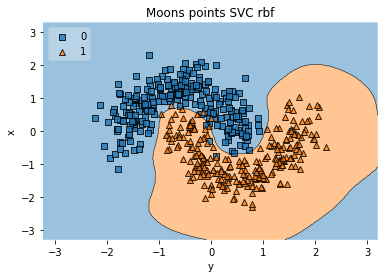

f1 score = 0.9859719438877755
Accuracy = 0.986


In [96]:
svm_rbf_best = grid_search_rbf.best_estimator_

plot_decisions(svm_rbf_best, X_train, y_train, 'rbf')

##### №3 Sigmoid kernel

In [108]:
svm_sig = SVC(kernel='sigmoid', max_iter = 10000, tol = 0.0001)

parametrs_sig = {'C':np.linspace(0.001, 4, 10), 'gamma':np.linspace(0, 2, 20), 'coef0': np.linspace(1, 2, 10)}

grid_search_sig = GridSearchCV(svm_sig, parametrs_sig, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_sig.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 4.45333e-01, 8.89667e-01, 1.33400e+00, 1.77833e+00,
       2.22267e+00, 2.66700e+00, 3.11133e+00, 3.55567e+00, 4.00000e+00]), 'gamma': array([0.     , 0.10526, 0.21053, 0.31579, 0.42105, 0.52632, 0.63158,
       0.73684, 0.84211, 0.94737, 1.05263, 1.15789, 1.26316, 1.36842,
       1.47368, 1.57895, 1.68421, 1.78947, 1.89474, 2.     ]), 'coef0': array([1.     , 1.11111, 1.22222, 1.33333, 1.44444, 1.55556, 1.66667,
       1.77778, 1.88889, 2.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [109]:
grid_search_sig.best_estimator_

SVC(C=1.334, cache_size=200, class_weight=None, coef0=1.4444444444444444,
  decision_function_shape='ovr', degree=3, gamma=0.10526315789473684,
  kernel='sigmoid', max_iter=10000, probability=False, random_state=None,
  shrinking=True, tol=0.0001, verbose=False)

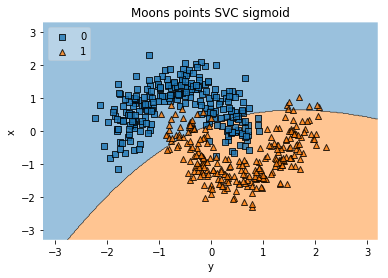

f1 score = 0.842315369261477
Accuracy = 0.842


In [110]:
svm_sig_best = grid_search_sig.best_estimator_

plot_decisions(svm_sig_best, X_train, y_train, 'sigmoid')

#### Inside:
1) Classification quality increased with using RBF and Poly, but sigmoid had a bit worse results comparing with base-line.

2) Borders was changing with each method.

3) GridSearchCV chose degree = 3. I think it's because dataset have some polynominal-like fold and poly with third degree is able to describe data very good.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(moons_points)
X_train_poly

array([[ 1.00000000e+00,  8.30857788e-01, -3.34342282e-01, ...,
        -2.30804724e-01,  9.28772398e-02, -3.73743723e-02],
       [ 1.00000000e+00,  9.91709551e-01,  8.78999659e-01, ...,
         8.64485471e-01,  7.66234865e-01,  6.79150648e-01],
       [ 1.00000000e+00,  1.10724530e+00, -4.70343756e-01, ...,
        -5.76637751e-01,  2.44948401e-01, -1.04050974e-01],
       ...,
       [ 1.00000000e+00,  3.45548186e-01, -1.28434196e-01, ...,
        -1.53354988e-02,  5.69993575e-03, -2.11856608e-03],
       [ 1.00000000e+00,  1.40388981e+00, -4.66993261e-01, ...,
        -9.20400095e-01,  3.06164088e-01, -1.01843154e-01],
       [ 1.00000000e+00,  7.55942783e-02,  1.37596545e+00, ...,
         7.86294758e-03,  1.43121205e-01,  2.60508915e+00]])

In [114]:
lr_poly = LogisticRegression(max_iter=10000, tol = 0.0001, solver='liblinear')

parametrs = {'C':np.linspace(0.001, 20, 20)}

grid_search_lr = GridSearchCV(lr_poly, parametrs, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-03, 1.05358e+00, 2.10616e+00, 3.15874e+00, 4.21132e+00,
       5.26389e+00, 6.31647e+00, 7.36905e+00, 8.42163e+00, 9.47421e+00,
       1.05268e+01, 1.15794e+01, 1.26319e+01, 1.36845e+01, 1.47371e+01,
       1.57897e+01, 1.68423e+01, 1.78948e+01, 1.89474e+01, 2.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [155]:
grid_search_lr.best_estimator_

LogisticRegression(C=9.474210526315789, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

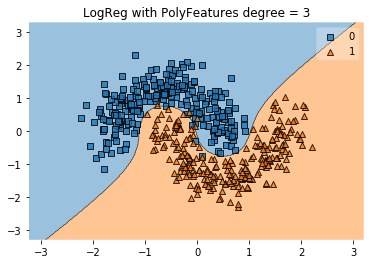

f1 score = 0.9859719438877755
Accuracy = 0.986


In [162]:
from sklearn.pipeline import Pipeline

steps = [('poly', PolynomialFeatures(degree=3)),
         ('lr_poly_best',LogisticRegression(C=9.474210526315789, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

fig = plot_decision_regions(X=X_train, y=y_train,
                            clf=pipeline)
plt.title('LogReg with PolyFeatures degree = 3')
plt.show()

print('f1 score = {}'.format(f1_score(pipeline.predict(X_train), y_train)))
print('Accuracy = {}'.format(pipeline.score(X_train, y_train)))

#### Inside:
1) Quality of LR with polynominal features and SVM poly-kernel are pretty equal. I suppose we made 'kernel-trick' here by ourselves with 'PolynominalFeatures', that's why we had same results

2) Of course SVM poly-kernel and polynominal features had sane degree value.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

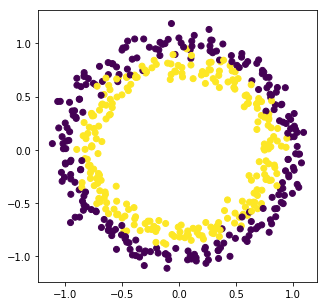

In [173]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

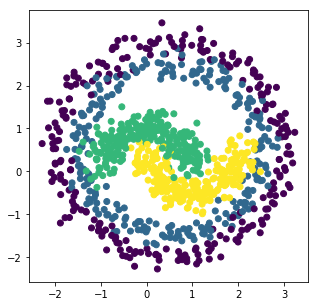

In [174]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

### First data-set

#### Logistic Regression

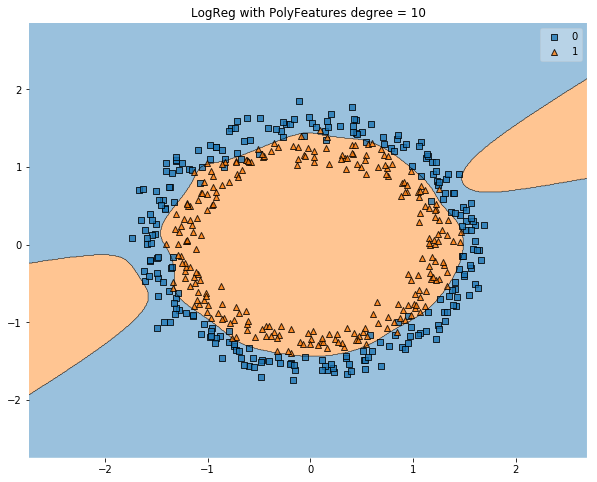

f1 score = 0.9525691699604742
Accuracy = 0.952


In [268]:
X_train_circ = scaler.fit_transform(circles_points)
y_train_circ = circles_labels

poly_circ = PolynomialFeatures(degree=10)

X_train_circ_poly = poly_circ.fit_transform(X_train_circ)

lr_circ = LogisticRegression(max_iter=10000, tol = 0.0001, solver='liblinear')

parametrs_circ = {'C':np.linspace(0.001, 20, 20)}

grid_search_circ = GridSearchCV(lr_circ, parametrs_circ, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_circ.fit(X_train_circ_poly, y_train)

grid_search_circ.best_estimator_

steps = [('poly_circ', PolynomialFeatures(degree=14)),
         ('lr_circ_best',grid_search_circ.best_estimator_)]

pipeline = Pipeline(steps)
pipeline.fit(X_train_circ, y_train_circ)

fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X_train_circ, y_train_circ, clf=pipeline)
plt.title('LogReg with PolyFeatures degree = 10')
plt.show()

print('f1 score = {}'.format(f1_score(pipeline.predict(X_train_circ), y_train_circ)))
print('Accuracy = {}'.format(pipeline.score(X_train_circ, y_train_circ)))

#### SVM

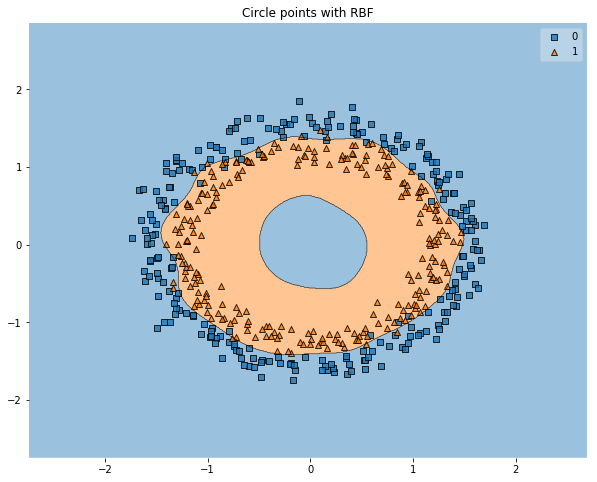

f1 score = 0.9540918163672655
Accuracy = 0.954


In [253]:
svm_rbf_circ = SVC(kernel='rbf', max_iter = 10000, tol = 0.0001)

parametrs_rbf_circ = {'C':np.linspace(15, 30, 20), 'gamma':np.linspace(2, 7, 20)}

grid_search_rbf_circ = GridSearchCV(svm_rbf_circ, parametrs_rbf_circ, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_rbf_circ.fit(X_train_circ, y_train_circ)

grid_search_rbf_circ.best_estimator_

svm_rbf_circ_best = grid_search_rbf_circ.best_estimator_

fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X=X_train_circ, y=y_train_circ, clf=svm_rbf_circ_best)

plt.title('Circle points with RBF')
plt.show()

print('f1 score = {}'.format(f1_score(svm_rbf_circ_best.predict(X_train_circ), y_train_circ)))
print('Accuracy = {}'.format(svm_rbf_circ_best.score(X_train_circ, y_train_circ)))

#### Inside:
SVM got better results, because RBF is very good model for circle points. We can make a good model using LogRes and polynominal features, but none of degree can't provide us with ideal circle approximated features.

Also we didn't use train-test split, but using graphic we can see everything we want: a) estimate overfitting b) decide good or bad is model and etc.

#### Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(max_features = 2, bootstrap=True, n_jobs=-1)

param_forest = {'n_estimators':np.arange(30, 50), 'max_depth':np.arange(5, 15)}

gs_forest = GridSearchCV(forest, param_forest, cv = 5, scoring = 'accuracy', n_jobs=-1)
gs_forest.fit(X_train_circ, y_train_circ)

gs_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

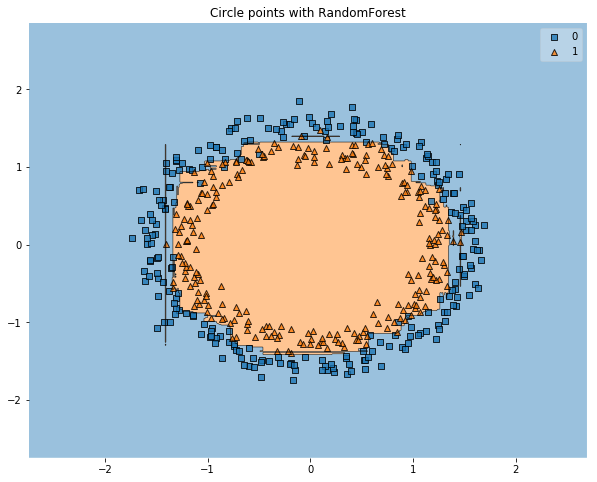

f1 score = 0.99009900990099
Accuracy = 0.99


In [252]:
forest_best = gs_forest.best_estimator_

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X=X_train_circ, y=y_train_circ, clf=forest_best)

plt.title('Circle points with RandomForest')
plt.show()

print('f1 score = {}'.format(f1_score(forest_best.predict(X_train_circ), y_train_circ)))
print('Accuracy = {}'.format(forest_best.score(X_train_circ, y_train_circ)))

#### Note:

Trees got 0.99 accuracy, but we should remember, that we didn't do Train-test split, only tried to approximate model. Because of overfitting score for trees was very good.

### Second data-set

#### Logistic Regression

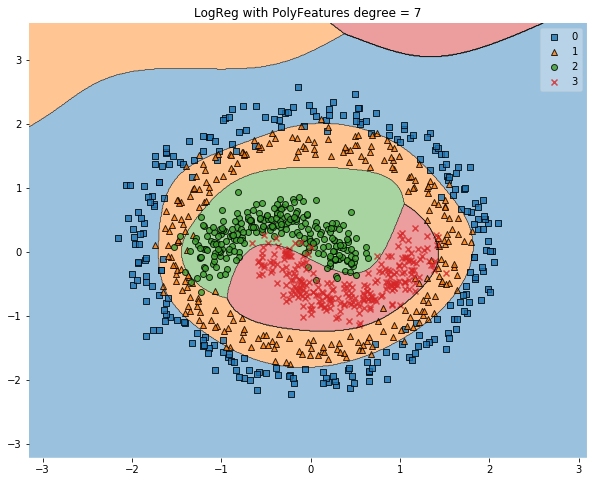

f1 score = 0.9430617359566212
Accuracy = 0.943


In [246]:
X_train_hard = scaler.fit_transform(points)
y_train_hard = labels

poly_hard = PolynomialFeatures(degree=7)

X_train_hard_poly = poly_circ.fit_transform(X_train_hard)

lr_hard = LogisticRegression(max_iter=10000, tol = 0.0001, solver='lbfgs', multi_class='multinomial')

parametrs_hard = {'C':np.linspace(1, 4, 5), 'penalty':['l2']}

grid_search_hard = GridSearchCV(lr_hard, parametrs_hard, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_hard.fit(X_train_hard_poly, y_train_hard)

grid_search_hard.best_estimator_

steps = [('poly', PolynomialFeatures(degree=7)),
         ('lr_hard_best',grid_search_hard.best_estimator_)]

pipeline = Pipeline(steps)
pipeline.fit(X_train_hard, y_train_hard)

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X_train_hard, y_train_hard,
                            clf=pipeline)
plt.title('LogReg with PolyFeatures degree = 7')
plt.show()

print('f1 score = {}'.format(f1_score(pipeline.predict(X_train_hard), y_train_hard, average = 'macro')))
print('Accuracy = {}'.format(pipeline.score(X_train_hard, y_train_hard)))

#### SVM with RBF

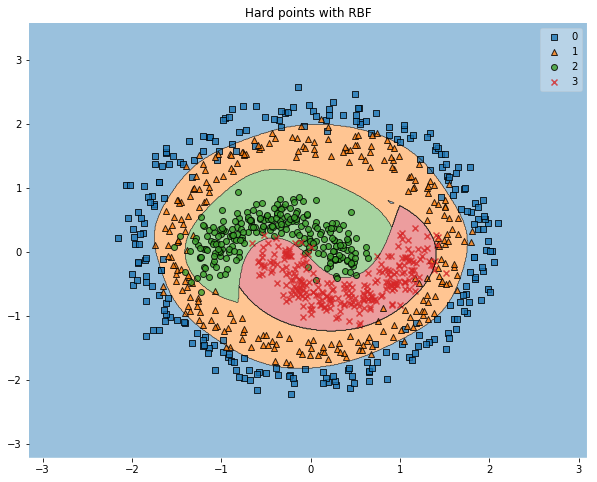

f1 score = 0.9431003595288361
Accuracy = 0.943


In [263]:
svm_rbf_hard = SVC(kernel='rbf', max_iter = 10000, tol = 0.0001)

parametrs_rbf_hard = {'C':np.linspace(8, 12, 10), 'gamma':np.linspace(0.5, 2, 10)}

grid_search_rbf_hard = GridSearchCV(svm_rbf_hard, parametrs_rbf_hard, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_rbf_hard.fit(X_train_hard, y_train_hard)

grid_search_rbf_hard.best_estimator_

svm_rbf_hard_best = grid_search_rbf_hard.best_estimator_

fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X=X_train_hard, y=y_train_hard, clf=svm_rbf_hard_best)

plt.title('Hard points with RBF')
plt.show()

print('f1 score = {}'.format(f1_score(svm_rbf_hard_best.predict(X_train_hard), y_train_hard, average = 'macro')))
print('Accuracy = {}'.format(svm_rbf_hard_best.score(X_train_hard, y_train_hard)))

#### SVM with Sigmoid

In [264]:
svm_sig_hard = SVC(kernel='sigmoid', max_iter = 10000, tol = 0.0001)

parametrs_sig_hard = {'C':np.linspace(0.001, 4, 10), 'gamma':np.linspace(0, 2, 20), 'coef0': np.linspace(1, 2, 10)}

grid_search_sig_hard = GridSearchCV(svm_sig_hard, parametrs_sig_hard, cv = 5, scoring = 'accuracy', n_jobs=-1)
grid_search_sig_hard.fit(X_train_hard, y_train_hard)

grid_search_sig_hard.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='sigmoid',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

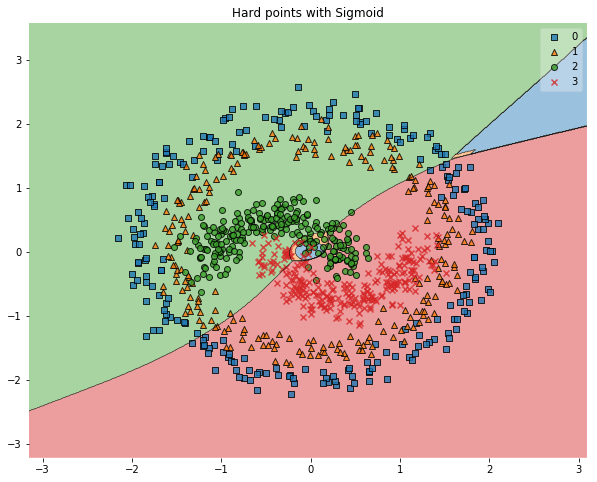

f1 score = 0.2617612466921494
Accuracy = 0.387


In [265]:
svm_sig_hard_best = grid_search_sig_hard.best_estimator_

fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X_train_hard, y_train_hard, clf=svm_sig_hard_best)

plt.title('Hard points with Sigmoid')
plt.show()

print('f1 score = {}'.format(f1_score(svm_sig_hard_best.predict(X_train_hard), y_train_hard, average = 'macro')))
print('Accuracy = {}'.format(svm_sig_hard_best.score(X_train_hard, y_train_hard)))

#### Note: 
Sigmoid-kernel works pretty bad on this kind of data-set (Does it?)

We can use here Poly-kernel, but it's pretty the same as LogRes with PolyFeatures

#### Random Forest

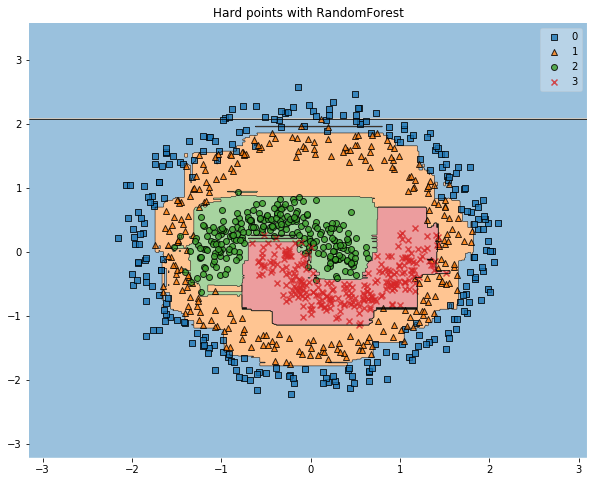

f1 score = 0.998999995999984
Accuracy = 0.999


In [267]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(max_features = 2, bootstrap=True, n_jobs=-1)

param_forest_hard = {'n_estimators':np.arange(30, 50), 'max_depth':np.arange(5, 15)}

gs_forest = GridSearchCV(forest, param_forest, cv = 5, scoring = 'accuracy', n_jobs=-1)
gs_forest.fit(X_train_hard, y_train_hard)

gs_forest.best_estimator_

forest_best = gs_forest.best_estimator_

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X=X_train_hard, y=y_train_hard, clf=forest_best)

plt.title('Hard points with RandomForest')
plt.show()

print('f1 score = {}'.format(f1_score(forest_best.predict(X_train_hard), y_train_hard, average = 'macro')))
print('Accuracy = {}'.format(forest_best.score(X_train_hard, y_train_hard)))

#### Inside:

As always Random Forest got ideal results :) (But we can see on the graph that Forest is overfitted (look at yellow horizontal line near y=2)